## Importing All the necessary Libraries

In [38]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

## Loading and Cleaning Whale Data

In [26]:
whale_returns_csv = Path("Resources/whale_returns.csv")
# Use the file path to read the CSV into a DataFrame and display a few rows
whale_df = pd.read_csv(whale_returns_csv)
whale_df.head()
# Checking the nulls
whale_df.isnull()
# Determining number of nulls
whale_df.isnull().sum()
# Use the `dropna` function to drop whole records that have at least one null value
whale_df.dropna(inplace=True)
whale_df.set_index(pd.to_datetime(whale_df['Date'],  infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Loading and Cleaning ALGO data


In [27]:
algo_returns_csv = Path("Resources/algo_returns.csv")

# Use the file path to read the CSV into a DataFrame and display a few rows
algo_df = pd.read_csv(algo_returns_csv)
algo_df.head()
# Checking the nulls
algo_df.isnull()
# Determining number of nulls
algo_df.isnull().sum()
# Use the `dropna` function to drop whole records that have at least one null value
algo_df.dropna(inplace=True)


algo_df.set_index(pd.to_datetime(algo_df['Date'],  infer_datetime_format=True), inplace=True)
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## Cleaning S&P500 Data

In [28]:

sp500_history_csv = Path("Resources/sp500_history.csv")
# Use the file path to read the CSV into a DataFrame and display a few rows
sp_df = pd.read_csv(sp500_history_csv)
#Remove $ sign from  and Change it to numberic
sp_df["Close"] = sp_df["Close"].str.replace('$','')
sp_df[["Close"]] = sp_df[["Close"]].apply(pd.to_numeric)
sp_df.set_index(pd.to_datetime(sp_df['Date'],  infer_datetime_format=True), inplace=True)
sp_df.drop(columns=['Date'], inplace=True)
sp_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Daily Return DataSet

In [29]:
daily_returns =sp_df.pct_change()
daily_returns.head()
daily_returns.isnull()
# Determining number of nulls
daily_returns.isnull().sum()
# Use the `dropna` function to drop whole records that have at least one null value
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

columns = ["S&P"]
daily_returns.columns = columns
daily_returns.head()

,S&P
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [30]:
appended_data = pd.concat([algo_df, whale_df, daily_returns], axis="columns", join="inner")
appended_data.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.000509
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.002279
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001577


##Portfolio Analysis

#Calculate and Plot the daily returns 

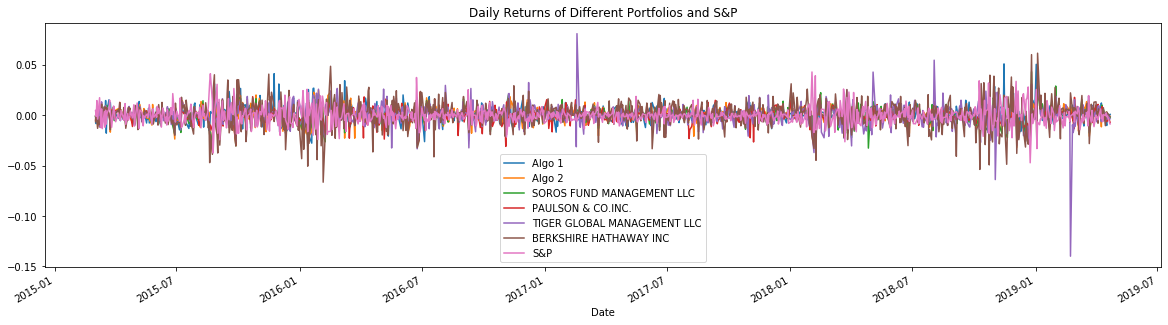

In [22]:
appended_data.plot(figsize=(20,5),title="Daily Returns of Different Portfolios and S&P")



## Calculate and Plot the Cumulative Return

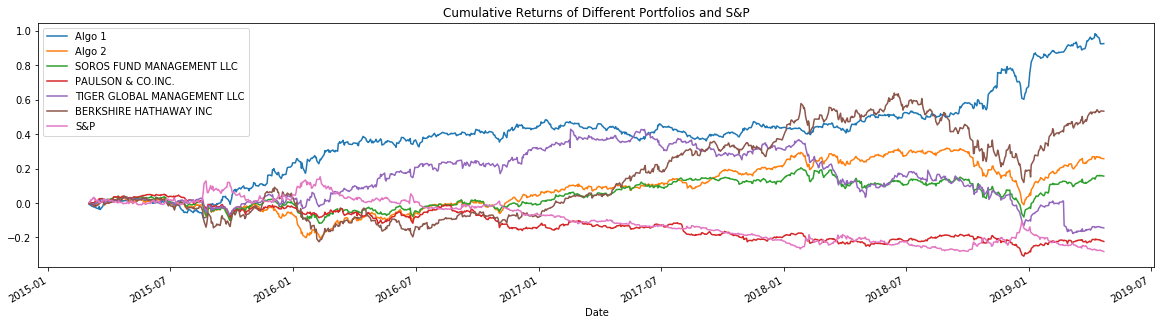

In [24]:
cumulative_returns = (1 + appended_data).cumprod() - 1
# Plotting cumulative return
cumulative_returns.plot(figsize=(20,5),title="Cumulative Returns of Different Portfolios and S&P")

### Risk

## Create a box plot for each portfolio.

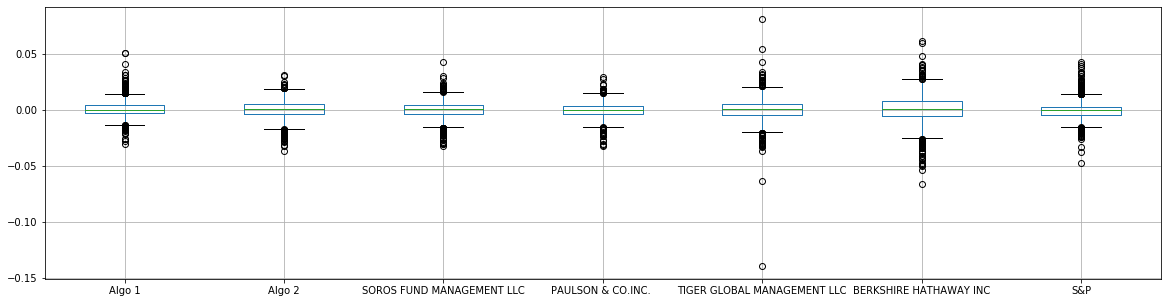

In [27]:
boxplot=appended_data.boxplot(figsize=(20,5)) 



 # Standard Deviation of Each Portfolio

In [28]:
columns = ["Algo 1", "Algo 2", "SOROS", "PAUL", "TIGER", "BERKSHIRE", "S&P"]
appended_data.columns = columns

std_algo1=round(appended_data["Algo 1"].std(),4)
print(f"Standard Deviation of Portfolio Algo1",std_algo1)
std_algo2=round(appended_data["Algo 2"].std(),4)
print(f"Standard Deviation of Portfolio Algo1",std_algo2)    
std_sf=round(appended_data["SOROS"].std(),4)
print(f"Standard Deviation of Portfolio SOROS FUND MANAGEMENT LLC",std_sf) 
std_p=round(appended_data["PAUL"].std(),4)
print(f"Standard Deviation of Portfolio PAULSON & CO. INC.",std_p) 
std_gm=round(appended_data["TIGER"].std(),4)
print(f"Standard Deviation of Portfolio TIGER GLOBAL MANAGEMENT LLC",std_gm) 
std_b=round(appended_data["BERKSHIRE"].std(),4)
print(f"Standard Deviation of Portfolio BERKSHIRE HATHAWAY INC",std_b) 
std_sp=round(appended_data["S&P"].std(),4)
print(f"Standard Deviation of Portfolio S&P",std_sp) 
print("-------------------")

Standard Deviation of Portfolio Algo1 {0.0076}
Standard Deviation of Portfolio Algo1 {0.0083}
Standard Deviation of Portfolio SOROS FUND MANAGEMENT LLC {0.0079}
Standard Deviation of Portfolio PAULSON & CO. INC. {0.007}
Standard Deviation of Portfolio TIGER GLOBAL MANAGEMENT LLC {0.0109}
Standard Deviation of Portfolio BERKSHIRE HATHAWAY INC {0.0129}
Standard Deviation of Portfolio S&P {0.0086}
-------------------


## Determine which portfolios are riskier than the S&P 500

In [31]:
sd_all={}
sd_all={'Algo 1':std_algo1,'Algo 2':std_algo2, 'SOROS FUND MANAGEMENT':std_sf,'PAULSON & CO':std_p,'TIGER GLOBAL MANAGEMENT':std_gm, 'BERKSHIRE HATHAWAY':std_b, 'S&P 500':std_sp}
print("The following Portfolios have a standardard variation that is greater than S&P 500")

for key in sd_all:
    if sd_all[key]>sd_all['S&P 500']:
        print (key)
print("-------------------")        


The following Portfolios have a standardard variation that is greater than S&P 500
TIGER GLOBAL MANAGEMENT
BERKSHIRE HATHAWAY
-------------------


## Calculate the Annualized Standard Deviation

In [30]:
for key in sd_all:
     asd=round(sd_all[key]*((252)**(1/2)),4)
     print ('Annualized Standard Deviation for '+key+' is', asd)  

Annualized Standard Deviation for Algo 1 is 0.1206
Annualized Standard Deviation for Algo 2 is 0.1318
Annualized Standard Deviation for SOROS FUND MANAGEMENT is 0.1254
Annualized Standard Deviation for PAULSON & CO is 0.1111
Annualized Standard Deviation for TIGER GLOBAL MANAGEMENT is 0.173
Annualized Standard Deviation for BERKSHIRE HATHAWAY is 0.2048
Annualized Standard Deviation for S&P 500 is 0.1365


### Rolling Statistics

#Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window

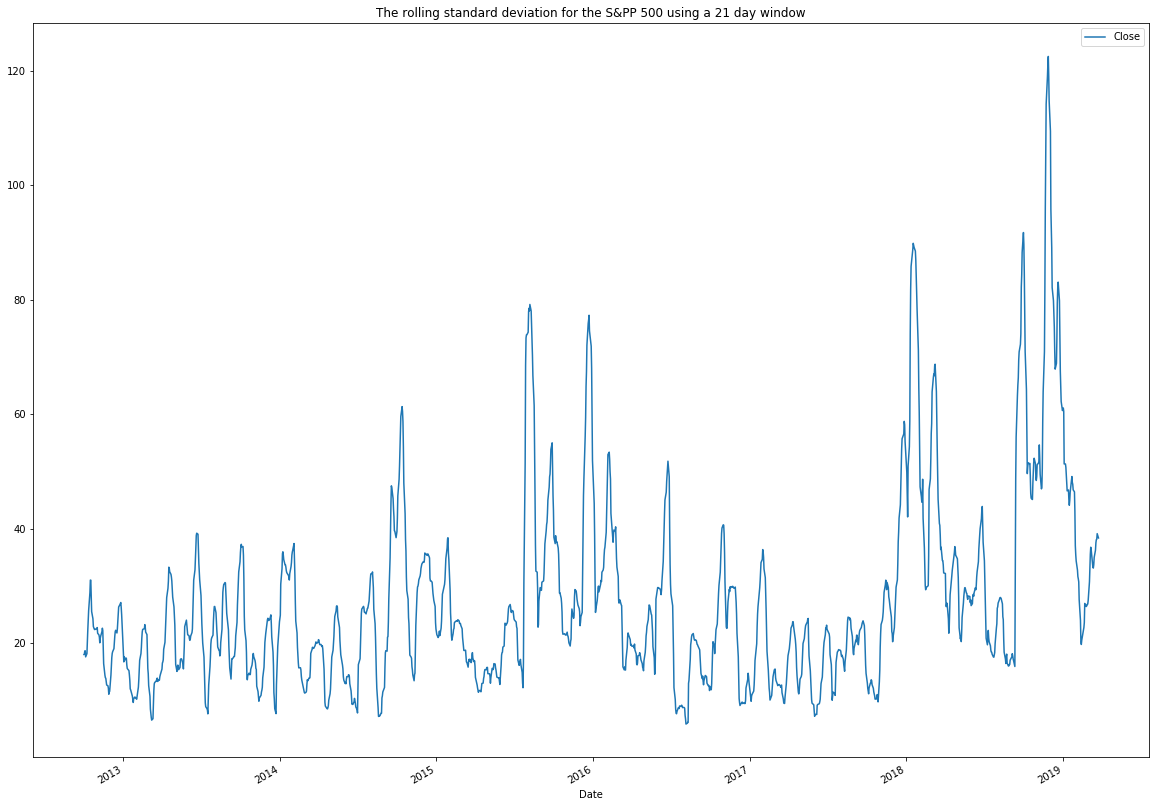

In [32]:
sp_df.rolling(window=21).std().plot(figsize=(20,15),title="The rolling standard deviation for the S&PP 500 using a 21 day window")




#Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500

In [33]:
correlation = appended_data.corr()
correlation

,Algo 1,Algo 2,SOROS,PAUL,TIGER,BERKSHIRE,S&P
Algo 1,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678,-0.033963
Algo 2,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756,-0.002192
SOROS,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157,0.000574
PAUL,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451,0.013549
TIGER,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125,-0.001505
BERKSHIRE,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000,-0.013856
S&P,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856,1.000000


#SOROS and PAUL mimics the S&P, they both have positive correlation with S&P

# Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

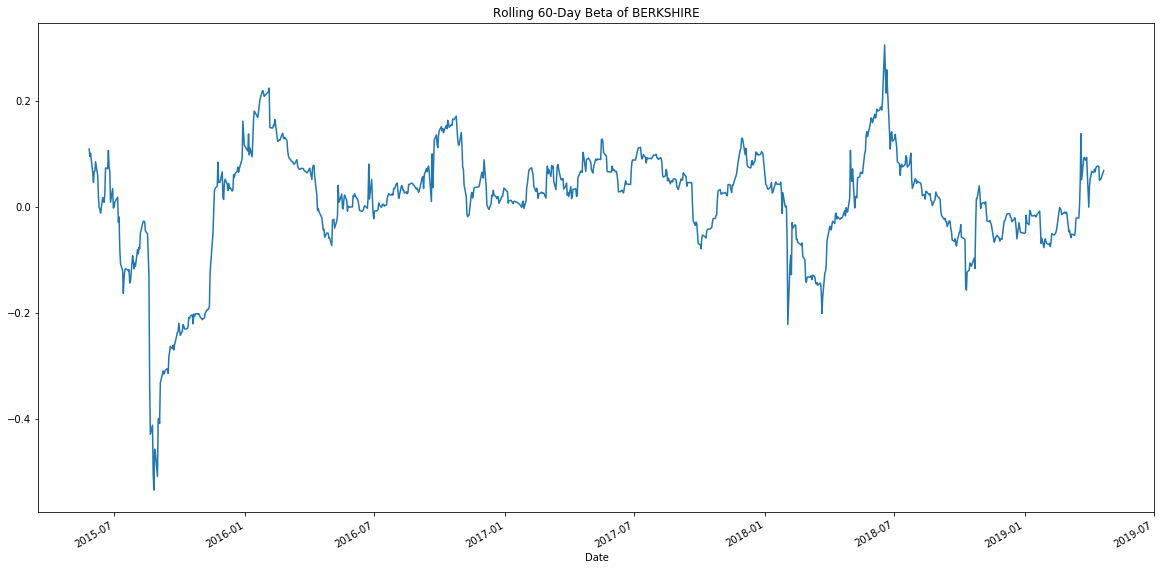

In [37]:
covariance = appended_data['BERKSHIRE'].rolling(window=60).cov(daily_returns['S&P'])
variance = appended_data['BERKSHIRE'].rolling(window=60).var()
berk_beta_60 = covariance / variance
berk_beta_60.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE')

## Sharpe Ratios

#Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [40]:

sharpe_ratios = (appended_data.mean() * 252) / (appended_data.std() * np.sqrt(252))
sharpe_ratios
 

Algo 1       1.369589
Algo 2       0.484334
SOROS        0.342894
PAUL        -0.491422
TIGER       -0.130186
BERKSHIRE    0.606743
S&P         -0.518582
dtype: float64

#plot() these sharpe ratios using a barplot.

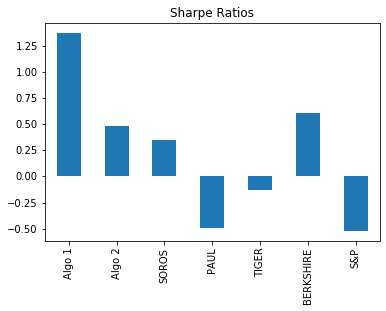

In [41]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

#Algo 1 has the best performance.

### Portfolio Returns (SAGE, AMZN, AMRN)

In [48]:
sage= Path("Resources/sage.csv")
# Use the file path to read the CSV into a DataFrame and display a few rows
sage_df= pd.read_csv(sage)
sage_df[["Close"]] =sage_df[["Close"]].apply(pd.to_numeric)
sage_df.set_index(pd.to_datetime(sage_df['Date'],  infer_datetime_format=True), inplace=True)
sage_df.drop(columns=['Date'], inplace=True)
columns = ["sage"]
sage_df.columns = columns
dsage_df =sage_df.pct_change()
dsage_df.dropna(inplace=True)
dsage_df.head()
    
    


,sage
Date,
2015-03-03,-0.000684
2015-03-04,-0.010488
2015-03-05,0.033410
2015-03-06,-0.041695
2015-03-09,-0.000465


In [49]:
amzn= Path("Resources/amzn.csv")
# Use the file path to read the CSV into a DataFrame and display a few rows
amzn_df= pd.read_csv(amzn)
amzn_df[["Close"]] =amzn_df[["Close"]].apply(pd.to_numeric)
amzn_df.set_index(pd.to_datetime(amzn_df['Date'],  infer_datetime_format=True), inplace=True)
amzn_df.drop(columns=['Date'], inplace=True)
columns = ["amzn"]
amzn_df.columns = columns
damzn_df =amzn_df.pct_change()
damzn_df.dropna(inplace=True)
damzn_df.head()
  

,amzn
Date,
2015-03-03,-0.002723
2015-03-04,-0.004914
2015-03-05,0.013352
2015-03-06,-0.019957
2015-03-09,-0.004025


In [50]:
amrn= Path("Resources/amrn.csv")
# Use the file path to read the CSV into a DataFrame and display a few rows
amrn_df= pd.read_csv(amrn)
amrn_df[["Close"]] =amrn_df[["Close"]].apply(pd.to_numeric)
amrn_df.set_index(pd.to_datetime(amrn_df['Date'],  infer_datetime_format=True), inplace=True)
amrn_df.drop(columns=['Date'], inplace=True)
columns = ["amrn"]
amrn_df.columns = columns
damrn_df =amrn_df.pct_change()
damrn_df.dropna(inplace=True)
damrn_df.head()

,amrn
Date,
2015-03-03,0.000000
2015-03-04,0.097403
2015-03-05,-0.011834
2015-03-06,0.065868
2015-03-09,0.056180


In [52]:
mystock_data = pd.concat([damzn_df, damrn_df, dsage_df], axis="columns", join="inner")
mystock_data.head()

,amzn,amrn,sage
Date,,,
2015-03-03,-0.002723,0.000000,-0.000684
2015-03-04,-0.004914,0.097403,-0.010488
2015-03-05,0.013352,-0.011834,0.033410
2015-03-06,-0.019957,0.065868,-0.041695
2015-03-09,-0.004025,0.056180,-0.000465


# Calculate weighted portfolio returns

In [59]:
weights = [1/3, 1/3, 1/3]
portfolio_returns = mystock_data.dot(weights)
columns = ["MyPortfolio"]

Date
2015-03-03   -0.001135
2015-03-04    0.027334
2015-03-05    0.011643
2015-03-06    0.001406
2015-03-09    0.017230
dtype: float64

In [65]:
total_data = pd.concat([portfolio_returns, appended_data], axis="columns", join="inner")
columns = ["MyPortfolio","Algo 1", "Algo 2", "SOROS", "PAUL", "TIGER", "BERKSHIRE", "S&P"]
total_data.columns = columns
damrn_df.dropna(inplace=True)
total_data.head()

,MyPortfolio,Algo 1,Algo 2,SOROS,PAUL,TIGER,BERKSHIRE,S&P
Date,,,,,,,,
2015-03-03,-0.001135,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,0.027334,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,0.011643,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,0.001406,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,0.017230,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


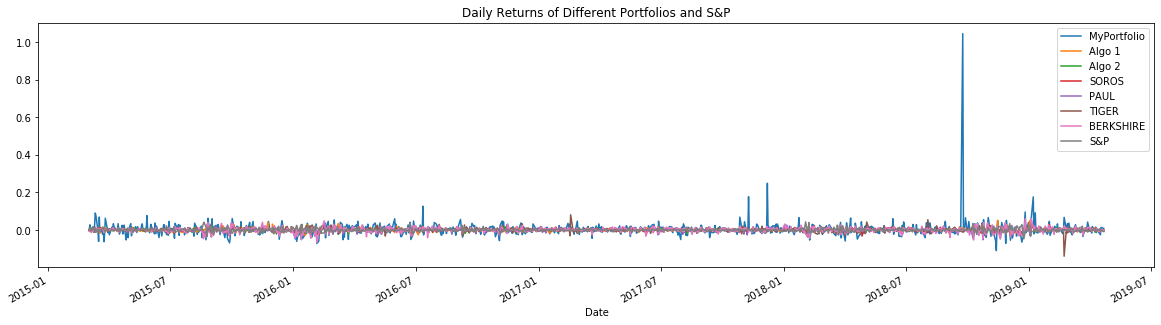

In [62]:
total_data.plot(figsize=(20,5),title="Daily Returns of Different Portfolios and S&P")

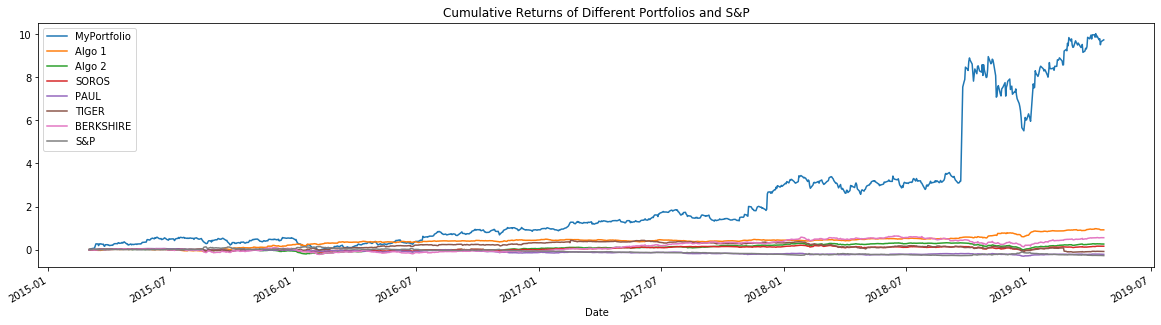

In [63]:
cumulative_returns = (1 + total_data).cumprod() - 1
# Plotting cumulative return
cumulative_returns.plot(figsize=(20,5),title="Cumulative Returns of Different Portfolios and S&P")

In [67]:
std_my=round(total_data["MyPortfolio"].std(),4)
print(f"Standard Deviation of MyPortfolio",std_my)
std_algo1=round(total_data["Algo 1"].std(),4)
print(f"Standard Deviation of Portfolio Algo1",std_algo1)
std_algo2=round(total_data["Algo 2"].std(),4)
print(f"Standard Deviation of Portfolio Algo1",std_algo2)    
std_sf=round(total_data["SOROS"].std(),4)
print(f"Standard Deviation of Portfolio SOROS FUND MANAGEMENT LLC",std_sf) 
std_p=round(total_data["PAUL"].std(),4)
print(f"Standard Deviation of Portfolio PAULSON & CO. INC.",std_p) 
std_gm=round(total_data["TIGER"].std(),4)
print(f"Standard Deviation of Portfolio TIGER GLOBAL MANAGEMENT LLC",std_gm) 
std_b=round(total_data["BERKSHIRE"].std(),4)
print(f"Standard Deviation of Portfolio BERKSHIRE HATHAWAY INC",std_b) 
std_sp=round(total_data["S&P"].std(),4)
print(f"Standard Deviation of Portfolio S&P",std_sp) 
print("-------------------")

Standard Deviation of MyPortfolio 0.0412
Standard Deviation of Portfolio Algo1 0.0076
Standard Deviation of Portfolio Algo1 0.0083
Standard Deviation of Portfolio SOROS FUND MANAGEMENT LLC 0.0079
Standard Deviation of Portfolio PAULSON & CO. INC. 0.007
Standard Deviation of Portfolio TIGER GLOBAL MANAGEMENT LLC 0.0107
Standard Deviation of Portfolio BERKSHIRE HATHAWAY INC 0.0129
Standard Deviation of Portfolio S&P 0.0086
-------------------


In [70]:
sd_all={}
sd_all={'MY PORTFOLIO':std_my,'Algo 1':std_algo1,'Algo 2':std_algo2, 'SOROS FUND MANAGEMENT':std_sf,'PAULSON & CO':std_p,'TIGER GLOBAL MANAGEMENT':std_gm, 'BERKSHIRE HATHAWAY':std_b, 'S&P 500':std_sp}
print("The following Portfolios have a standardard variation that is greater than S&P 500")

for key in sd_all:
    if sd_all[key]>sd_all['S&P 500']:
        print (key)
print("-------------------")        



The following Portfolios have a standardard variation that is greater than S&P 500
MY PORTFOLIO
TIGER GLOBAL MANAGEMENT
BERKSHIRE HATHAWAY
-------------------


In [72]:
# All of the other portfolios are positivley cocrrelated with my portfolio. Excep s&P


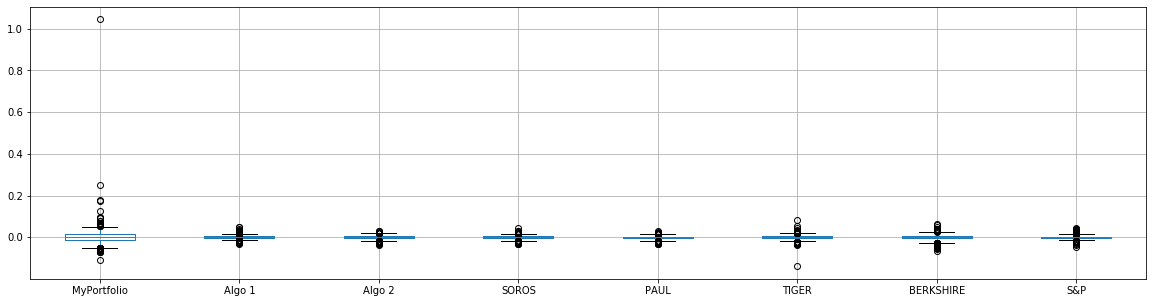

In [73]:
boxplot=total_data.boxplot(figsize=(20,5)) 

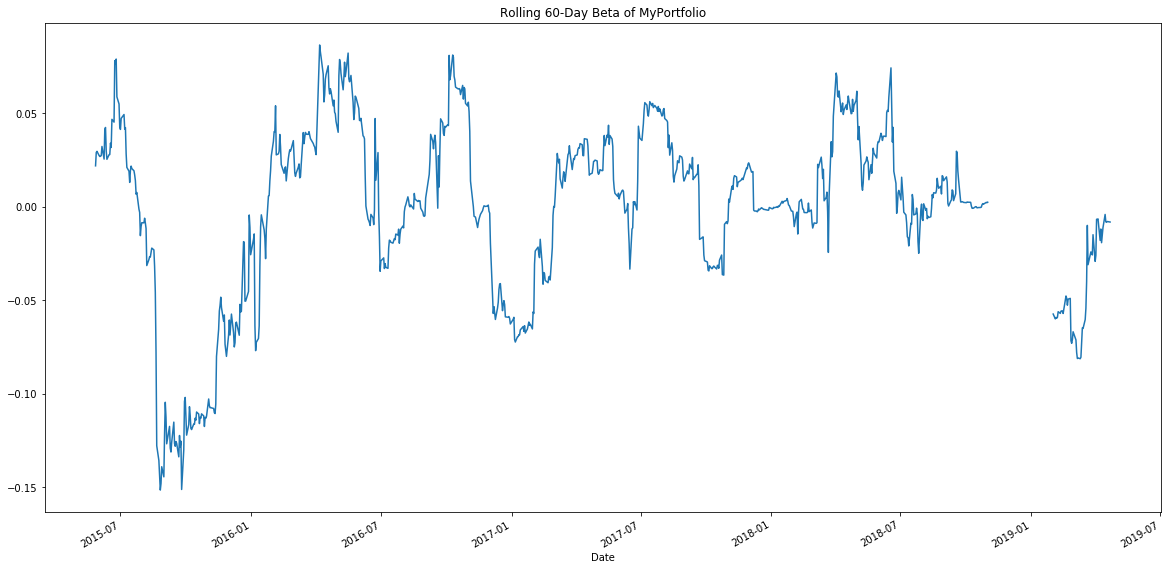

In [75]:
covariance = total_data['MyPortfolio'].rolling(window=60).cov(daily_returns['S&P'])
variance = total_data['MyPortfolio'].rolling(window=60).var()
berk_beta_60 = covariance / variance
berk_beta_60.plot(figsize=(20, 10), title='Rolling 60-Day Beta of MyPortfolio')

In [76]:

sharpe_ratios = (total_data.mean() * 252) / (total_data.std() * np.sqrt(252))
sharpe_ratios
 

MyPortfolio    1.123855
Algo 1         1.363124
Algo 2         0.486483
SOROS          0.344756
PAUL          -0.482799
TIGER         -0.041555
BERKSHIRE      0.622043
S&P           -0.509038
dtype: float64

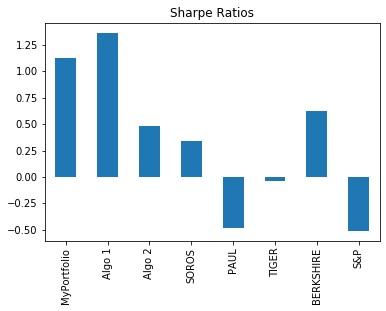

In [77]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [78]:
correlation = total_data.corr()
correlation

,MyPortfolio,Algo 1,Algo 2,SOROS,PAUL,TIGER,BERKSHIRE,S&P
MyPortfolio,1.000000,0.204787,0.314856,0.282283,0.273460,0.105260,0.297298,-0.010738
Algo 1,0.204787,1.000000,0.287934,0.320976,0.268897,0.169120,0.292214,-0.033742
Algo 2,0.314856,0.287934,1.000000,0.826726,0.678110,0.514849,0.687946,-0.002285
SOROS,0.282283,0.320976,0.826726,1.000000,0.699861,0.569770,0.754400,0.000495
PAUL,0.273460,0.268897,0.678110,0.699861,1.000000,0.438538,0.545261,0.013225
TIGER,0.105260,0.169120,0.514849,0.569770,0.438538,1.000000,0.425757,-0.005058
BERKSHIRE,0.297298,0.292214,0.687946,0.754400,0.545261,0.425757,1.000000,-0.014460
S&P,-0.010738,-0.033742,-0.002285,0.000495,0.013225,-0.005058,-0.014460,1.000000
